1.13.1
2.2.4-tf
class_labels: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], class_names: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
type: <class 'list'>, <class 'list'>
[type]  train_image : <class 'numpy.ndarray'>, train_labels: <class 'numpy.ndarray'>
[shape] train_images: (60000, 28, 28), train_labels: (60000,)
[shape] test_images : (10000, 28, 28), test_labels : (10000,)
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
model type: <class 'tensorflow.python.keras.engine.sequential.Sequential

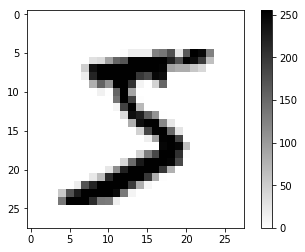

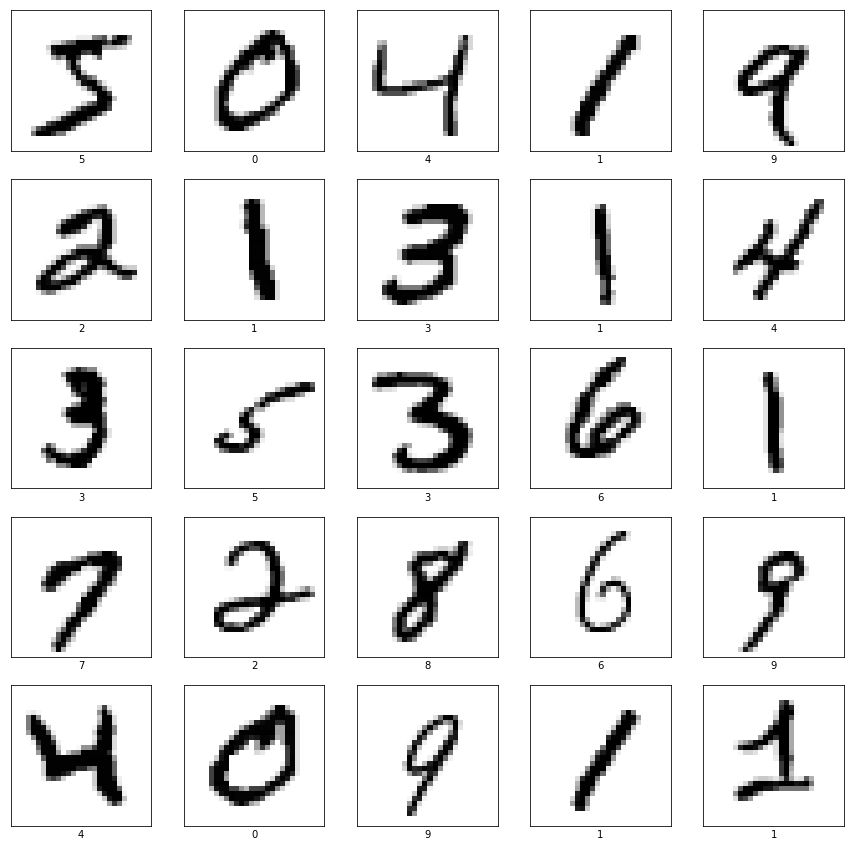

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

# model function
def create_model():
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28,28)))
    model.add(keras.layers.Dense(10, kernel_initializer=tf.keras.initializers.RandomNormal()))
    '''
    https://keras.io/layers/core/
    keras.layers.Dense(units, , , kernel_initializer='glorot_uniform',, , , , ,)
    units : 양의 정수, 출력 공간의 차원.
    kernel_initializer : kernel가중치 행렬에 대한 이니셜 라이저 ( 이니셜 라이저 참조 ).
    [입력 모양]
    모양이있는 nD 텐서 : (batch_size, ..., input_dim). 가장 일반적인 상황은 모양이있는 2D 입력입니다 (batch_size, input_dim).
    [출력 형태]
    모양이있는 nD 텐서 : (batch_size, ..., units). 
    예를 들어, 모양이있는 2D 입력의 (batch_size, input_dim)경우, 
    출력 형태는 (batch_size, units)됩니다.
    결국, 여기서 출력형태는 (100, 10)이 된다.
    '''
    return model

# loss function, 손실함수로 cross entropy를 사용한다
def loss_fn(model, images, labels):
    logits = model(images, training=True)
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(
            logits=logits, labels=labels))    
    return loss

# calculating gradient, 손실 값의 gradient를 구한다
def grad(model, images, labels):
    with tf.GradientTape() as tape:
        loss = loss_fn(model, images, labels)
    return tape.gradient(loss, model.variables)

# calculating model's accuracy
def evaluate(model, images, labels):#images, labels: (100, 28, 28), (100, 10)
#     print('[shape] evaluate, images shape: {0}'.format(images.shape))#(100, 28, 28)
#     print('[shape] evaluate, labels shape: {0}'.format(labels.shape))#(100, 10)
    logits = model(images, training=False)
#     print('[shape] evaluate, logits shape: {0}'.format(logits.shape))#(100, 10)
    # batch_size: 100, units는 10이므로 logits의 형태는 (100, 10)이 된다.위의 create_model 참고
    '''
    https://www.tensorflow.org/api_docs/python/tf/math/argmax
    tf.argmax(input, axis=none): input안에서 axis=0:각 열에서 큰 값(행인덱스)
    axis=1: 행에서 가장 큰값을 찾는다.
    '''
    # logits shape: (100,10), label shape: (100, 10)
#     print('[evaluate] logits, labels shape: {0}, {1}'.format(logits.shape, labels.shape))
#     print('[evaluate] logits data: {0}'.format(logits[0]))
#     print('[evaluate] labels data: {0}'.format(labels[0]))
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(labels, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    return accuracy

def show_mnist_dataset(class_labels, train_images):
  # print dataset
  plt.figure()
  plt.imshow(train_images[0], cmap=plt.cm.binary)
  plt.colorbar()
  
  plt.figure(figsize=(15,15))
  for i in range(25):
      plt.subplot(5,5,i+1)
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)
      plt.imshow(train_images[i], cmap=plt.cm.binary)
      plt.xlabel(class_labels[train_labels[i]])

def load_mnist_dataset(class_labels):
  # load dataset from keras api
  mnist = keras.datasets.mnist
  class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
  # copy class name list to argument
  for i in range(len(class_names)):
    class_labels.append(class_names[i])
  print('class_labels: {0}, class_names: {1}'.format(class_labels, class_names))
  print('type: {0}, {1}'.format(type(class_names), type(class_labels)))
  # load datasets
  (train_images, train_labels), (test_images, test_labels) = mnist.load_data()
  print('[type]  train_image : {0}, train_labels: {1}'.format(type(train_images), type(train_labels)))
  print('[shape] train_images: {0}, train_labels: {1}'.format(train_images.shape, train_labels.shape))
  print('[shape] test_images : {0}, test_labels : {1}'.format(test_images.shape, test_labels.shape))
  return (train_images, train_labels), (test_images, test_labels)

def load_fashion_mnist_dataset(class_labels):
  # load dataset from keras api
  mnist = keras.datasets.fashion_mnist
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  # copy class name list to argument
  for i in range(len(class_names)):
    class_labels.append(class_names[i])
  print('class_labels: {0}, class_names: {1}'.format(class_labels, class_names))
  print('type: {0}, {1}'.format(type(class_names), type(class_labels)))
  # load datasets
  (train_images, train_labels), (test_images, test_labels) = mnist.load_data()
  print('[type]  train_images: {0}, train_labels: {1}'.format(type(train_images), type(train_labels)))
  print('[shape] train_images: {0}, train_labels: {1}'.format(train_images.shape, train_labels.shape))
  print('[shape] test_images : {0}, test_labels : {1}'.format(test_images.shape, test_labels.shape))
  return (train_images, train_labels), (test_images, test_labels)

print(tf.__version__)
print(keras.__version__)

tf.enable_eager_execution()

# hyper parameters
learning_rate = 0.001
training_epochs = 20
batch_size = 100
tf.set_random_seed(777)

# load mnist datasets
class_labels = []
(train_images, train_labels), (test_images, test_labels) = load_mnist_dataset(class_labels)
show_mnist_dataset(class_labels=class_labels, train_images=train_images)

# convert dataset value to number in 0~1 
# one hot encoding
train_images = train_images.astype(np.float32) / 255.
test_images = test_images.astype(np.float32) / 255.
    
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)    
    
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).shuffle(
                buffer_size=100000).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(batch_size)


# create model
model = create_model()
model.summary()
print('model type: {}'.format(type(model)))

# optimizer
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)

# training
print('Learning started. It takes sometime.')
for epoch in range(training_epochs):
    avg_loss = 0.
    avg_train_acc = 0.
    avg_test_acc = 0.
    train_step = 0
    test_step = 0
    
    for images, labels in train_dataset:
        grads = grad(model, images, labels)                
        optimizer.apply_gradients(zip(grads, model.variables))
        loss = loss_fn(model, images, labels)
        acc = evaluate(model, images, labels)
        avg_loss = avg_loss + loss
        avg_train_acc = avg_train_acc + acc
        train_step += 1
    avg_loss = avg_loss / train_step
    avg_train_acc = avg_train_acc / train_step
    
    for images, labels in test_dataset:
#         print('[shape](test set) images, labels: {0}, {1}'.format(images.shape, labels.shape))
        acc = evaluate(model, images, labels)
        avg_test_acc = avg_test_acc + acc
        test_step += 1
    avg_test_acc = avg_test_acc / test_step    

    print('Epoch:', '{}'.format(epoch + 1), 'loss =', '{:.8f}'.format(avg_loss), 
          'train accuracy = ', '{:.4f}'.format(avg_train_acc), 
          'test accuracy = ', '{:.4f}'.format(avg_test_acc))


print('Learning Finished!')